In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
target_names = ['rectangle', 'triangle', 'circle']
target_contour_dict = {}

for target_name in target_names:
    target_path = f'datasets/tegaki/{target_name}.png'
    target = cv2.imread(target_path)
    target_gray = cv2.cvtColor(target, cv2.COLOR_BGR2GRAY)

    target_preprocessed = cv2.GaussianBlur(target_gray, (5, 5), 0)
    _, target_binary = cv2.threshold(target_preprocessed, 130, 255, cv2.THRESH_BINARY)
    target_binary = cv2.bitwise_not(target_binary)

    _, contours, _ = cv2.findContours(target_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    target_contour_dict[target_name] = contours[0]
    
    cv2.drawContours(target, target_contour_dict[target_name], -1, (0,0,255), 3)
    
    target = cv2.cvtColor(target, cv2.COLOR_BGR2RGB)
    plt.imshow(target)
    # plt.show()

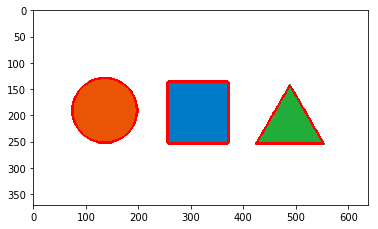

In [4]:
tar = 'datasets/tegaki/test.png'
tegaki = cv2.imread(tar)
tegaki_gray = cv2.cvtColor(tegaki, cv2.COLOR_BGR2GRAY)

tegaki_preprocessed = cv2.GaussianBlur(tegaki_gray, (5, 5), 0)
_, tegaki_binary = cv2.threshold(tegaki_preprocessed, 130, 255, cv2.THRESH_BINARY_INV)

_, tegaki_contours, _ = cv2.findContours(tegaki_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

height, width, _ = tegaki.shape

min_im_area = (height / 50) * (width / 50)
large_contours = [cnt for cnt in tegaki_contours if cv2.contourArea(cnt) > min_im_area]
cv2.drawContours(tegaki, large_contours, -1, (0,0,255), 3)

# BGRからRGBに変換して画像読込み
tegaki = cv2.cvtColor(tegaki, cv2.COLOR_BGR2RGB)

plt.imshow(tegaki)
plt.show()

In [5]:
def main():
    state = 'nomal'
    is_valid = True
    i = 0
    while i < len(shapes):
        shape = shapes[i]
        prev_shape = shapes[i-1] if i > 0 else shapes[-1]
        next_shape = shapes[i+1] if i != len(shapes)-1 else shapes[0]
        
        if shape['name'] == 'rectangle':
            print('rectangle')
        elif shape['name'] == 'triangle':
            if next_shape['name'] == 'rectangle':
                state = 'if'
                if rectangle():
                    is_valid = True
                else:
                    is_valid = False
            else:
                if state == 'nomal':
                    rep_start = i
                    state = 'rep'
                elif state == 'rep':
                    i = rep_start
                elif state == 'if':
                    is_valid = not is_valid
                    state = 'else'
                elif state == 'else':
                    is_valid = True
                    state = 'nomal'
        elif shape['name'] == 'circle':
            if is_valid == True:
                circle(i)
            else:
                pass
        else:
            print('WARN')
        i += 1

def rectangle():
    return True

def triangle():
    return 0

def circle(num):
    print('circle', num)
    return 0

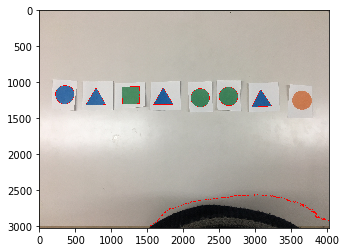

In [8]:
tar = 'datasets/tegaki/photo11.jpg'
tegaki = cv2.imread(tar)
tegaki_gray = cv2.cvtColor(tegaki, cv2.COLOR_BGR2GRAY)

tegaki_preprocessed = cv2.GaussianBlur(tegaki_gray, (5, 5), 0)
_, tegaki_binary = cv2.threshold(tegaki_preprocessed, 145, 255, cv2.THRESH_BINARY_INV)

_, tegaki_contours, _ = cv2.findContours(tegaki_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

height, width, _ = tegaki.shape

min_im_area = (height / 50) * (width / 50)
large_contours = [cnt for cnt in tegaki_contours if cv2.contourArea(cnt) > min_im_area]
cv2.drawContours(tegaki, large_contours, -1, (0,0,255), 3)

# BGRからRGBに変換して画像読込み
tegaki = cv2.cvtColor(tegaki, cv2.COLOR_BGR2RGB)

plt.imshow(tegaki)
plt.show()

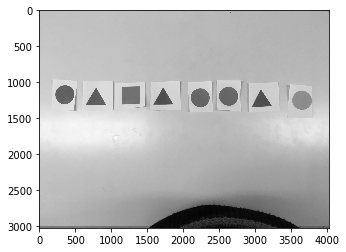

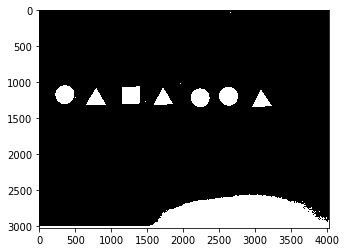

In [9]:
plt.imshow(cv2.GaussianBlur(tegaki_gray, (5, 5), 0))
plt.gray()
plt.show()

plt.imshow(tegaki_binary)
plt.show()

In [633]:
shapes = []

for large_contour in large_contours:
    shape = {}
    shape['contour'] = large_contour
    shape['similarity'] = 0.1
    shape['name'] = 'other'
    for target_name, target_contour in target_contour_dict.items():
        similarity = cv2.matchShapes(target_contour, shape['contour'],1,0.0)
        if shape['similarity'] > similarity:
            shape['similarity'] = similarity
            shape['name'] = target_name        
    shape['moments'] = cv2.moments(shape['contour'])
    shape['x'] = int(shape['moments']['m10']/shape['moments']['m00'])
    shape['y'] = int(shape['moments']['m01']/shape['moments']['m00'])
    if shape['name'] != 'other':
        shapes.append(shape)
    else:
        pass

shapes = sorted(shapes, key=lambda x:x['x'])

In [632]:
hsv = cv2.cvtColor(tegaki, cv2.COLOR_RGB2HSV)

for shape in shapes:
    shape['hsv'] = hsv[shape['y'], shape['x']]
    
    if 50 < shape['hsv'][0] < 80 and shape['hsv'][1] >100  and shape['hsv'][2] > 100:
        shape['color'] = 'green'
    elif 90 < shape['hsv'][0] < 126 and shape['hsv'][1] >150  and shape['hsv'][2] > 130:
        shape['color'] = 'blue'
    elif (169 < shape['hsv'][0] < 179 or 0 < shape['hsv'][0] < 25) and shape['hsv'][1] >150 and shape['hsv'][2] > 190:
        shape['color'] = 'orange'
    elif 0 < shape['hsv'][0] < 179 and shape['hsv'][1] < 50 and shape['hsv'][2] < 100:
        shape['color'] = 'gray'
    else:
        shape['color'] = 'other'
        
    print(shape['hsv'], '\t', shape['color'])
        

[106 179 155] 	 blue
[106 184 158] 	 blue
[ 70 122 130] 	 green
[ 10 166 203] 	 orange
[105 220 139] 	 blue
[ 70 126 123] 	 green
[ 69 123 120] 	 green
[106 190 138] 	 blue


In [607]:
class Shapes:
    state = 'nomal'
    num = 0
    repeat_count = 0
    
    def __init__(self, shapes):
        self.shapes = shapes
    
    def get_shape(self):
        return self.shapes[self.num]
    
    def get_prev_shape(self):
        return self.shapes[self.num - 1] if i > 0 else self.shapes[-1]
    
    def get_next_shape(self):
        return self.shapes[self.num + 1] if self.num != len(self.shapes) - 1 else self.shapes[0]
    
    def get_next_triangle_num(self):
        for i in range(self.num + 1, len(self.shapes)):
            if self.shapes[i]['name'] == 'triangle':
                return i
        return None
    
    def action(self):
        while self.num < len(self.shapes):
            if self.shapes[self.num]['name'] == 'rectangle':
                pass
            elif self.shapes[self.num]['name'] == 'triangle':
                self._triangle()
            elif self.shapes[self.num]['name'] == 'circle':
                self._circle()
            self._next()
            
    def reset(self):
        self.state = 'nomal'
        self.num = 0
    
    def _rectangle(self):
        import datetime
        return datetime.datetime.now().minute % 2 == 0
    
    def _triangle(self):
        if self.get_next_shape()['name'] == 'rectangle':
            if self._rectangle():
                self.state = 'if'
            else:
                self.num = self.get_next_triangle_num()
                self.state = 'else'
        else:
            if self.state == 'nomal':
                self.repeat_start_num = i
                self.state = 'repeat'
            elif self.state == 'repeat':
                if self.repeat_count > 4:
                    self.state = 'nomal'
                else:
                    self.num = self.repeat_start_num
                    self.repeat_count += 1
            elif self.state == 'if':
                self.num = self.get_next_triangle_num()
                self.state = 'nomal'
            elif self.state == 'else':
                self.state = 'nomal'

    def _circle(self):
        print('circle', self.num)
        return 0
        
    def _next(self):
        self.num += 1

In [572]:
s = Shapes(shapes)
s.action()
s.reset()

circle 0
circle 4
circle 5
circle 7


In [575]:
shapes[2]['color']

'other'

In [579]:
for shape in shapes:
    print(shape['hsv'], '\t', shape['color'])

[106 168 165] 	 other
[105 180 159] 	 other
[ 71 122 136] 	 other
[105 198 151] 	 other
[ 72 129 128] 	 other
[ 72 132 129] 	 other
[105 197 144] 	 other
[ 10 151 202] 	 orange


In [472]:
10 % 2

0

In [458]:
s._next()